## Libraries

In [2]:
import numpy as np
import pandas as pd
from timeit import default_timer as timer
from datetime import timedelta

from Jcb import calc_basis_matrix
from R import calc_penalty_matrix
from cordex_discrete import cordex_discrete
from cordex_continuous import cordex_continuous
from plot_fun import subplot_results
from bayesian_continuous import bo_loop
# %load_ext autotime

## Settings

In [69]:
runs = 10
levels = np.linspace(-1,1,3).tolist()
epochs = 1_000
optimality = 'A'
method = 'Nelder-Mead'
n_b = 8
n_x = 16
J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
R_0 = calc_penalty_matrix(n_b=n_b)

## Bayesian Optimization

In [58]:
# start = timer()
# results, best_cr, _ = bo_loop(epochs=100,
#                               runs=runs,
#                               feats=J_cb.shape[0],
#                               optimality=optimality,
#                               initialization_method=None,
#                               J_cb=J_cb,
#                               acq_f='UCB')
# end = timer()
# print(f"Best criterion {np.round(best_cr,3)} for optimality {optimality}. Execution time (s): {timedelta(seconds=end-start)}")

In [59]:
# subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 1000), results=results, J_cb=J_cb)

## Discrete Version

In [6]:
start = timer()
results, best_cr, _ = cordex_discrete(runs=runs,
                                   feats=J_cb.shape[0],
                                   levels=levels,
                                   epochs=epochs,
                                   J_cb=J_cb,
                                   optimality=optimality)
end = timer()
print(f"Optimality: {optimality}"
      f"\nBest criterion: {np.round(best_cr,3)}"
      f"\nExecution time (s): {timedelta(seconds=end-start)}")

100%|██████████| 1000/1000 [00:03<00:00, 332.31it/s]

Optimality: D
Best criterion: 0.189
Execution time (s): 0:00:03.026728


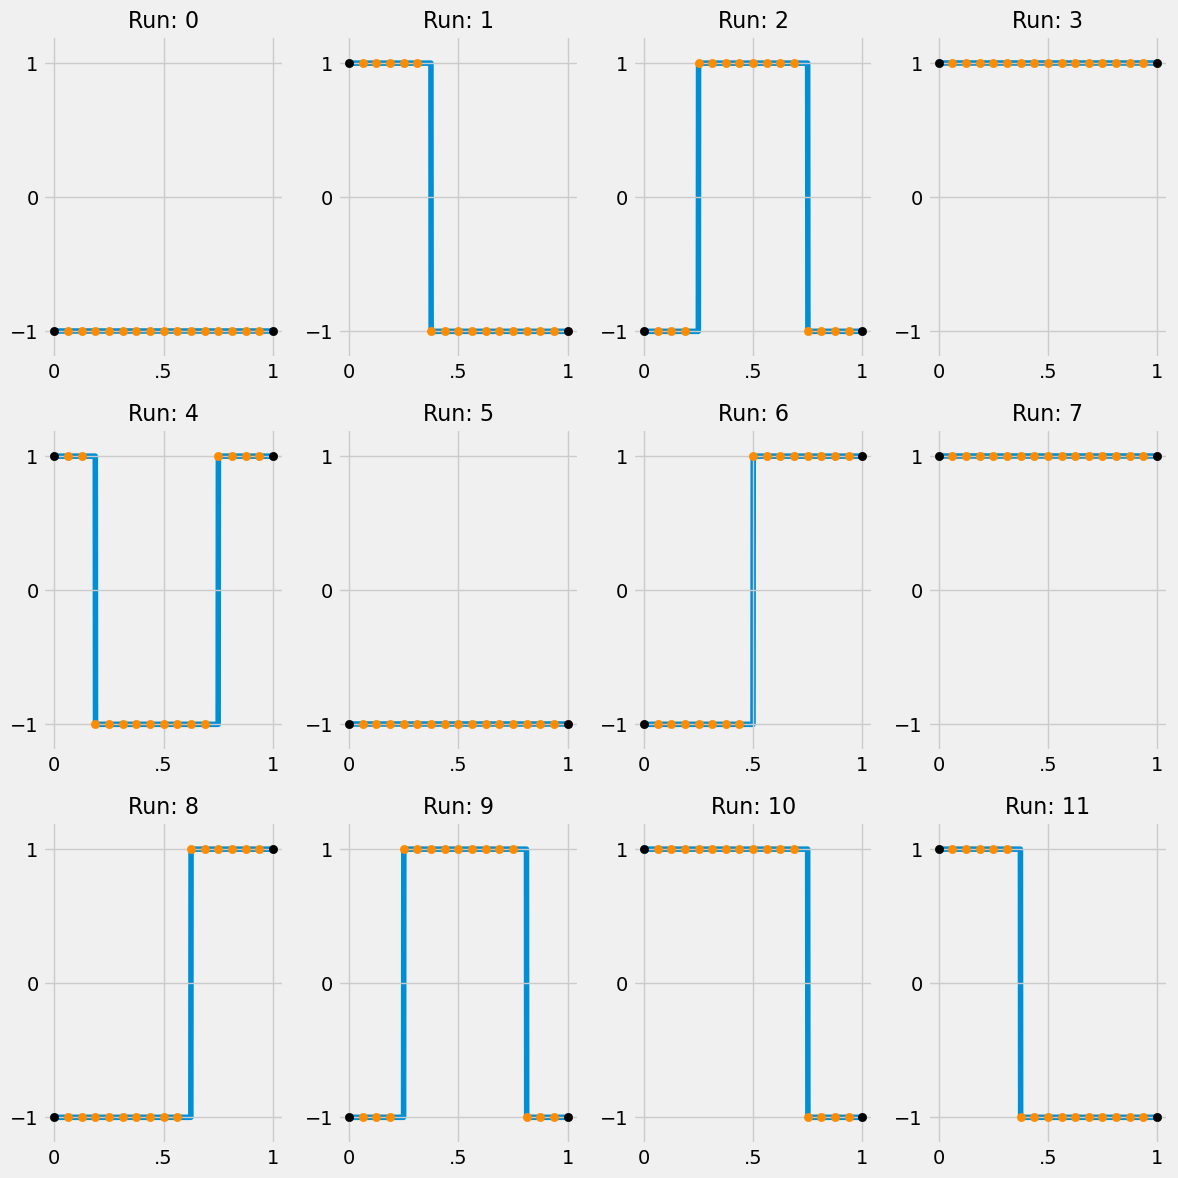

In [7]:
subplot_results(sub_x=3, sub_y=4, T=np.linspace(0, 1, 1000), results=results, J_cb=J_cb)

## Continuous Version

In [70]:
# Nelder-Mead, L-BFGS-B, Powell, TNC
start = timer()
results, best_cr, _ = cordex_continuous(runs=runs,
                                        feats=J_cb.shape[0],
                                        J_cb=J_cb,
                                        R_0=R_0,
                                        epochs=10,
                                        method=method,
                                        optimality='A',
                                        random_start=False,
                                        disable_bar=True,
                                        penalty=0.5)
end = timer()
print(f"Optimality: {optimality}"
      f"\nBest criterion: {np.round(best_cr,3)}"
      f"\nExecution time (s): {timedelta(seconds=end-start)}")

# Enforce smoothness for x(t)?
# nx=100, nb=3 => A_opt=206.884d
# 4.312
# 4.257
# 4.273
# 4.271

100%|██████████| 10/10 [00:13<00:00,  1.35s/it]

Optimality: A
Best criterion: 48684622.153
Execution time (s): 0:00:13.465310


In [71]:
Z = np.hstack((np.ones((runs,1)), results @ J_cb))
np.linalg.det(Z.T @ Z)

4.336332898737174e-37

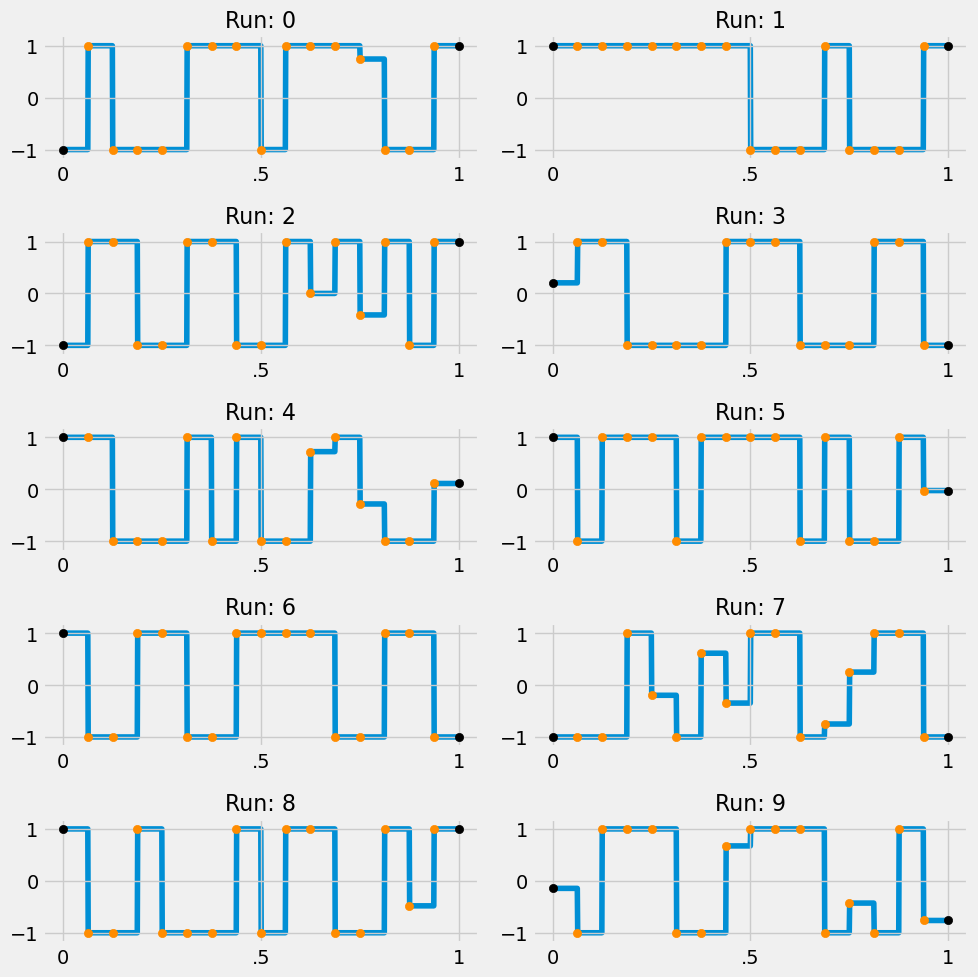

In [72]:
subplot_results(sub_x=5, sub_y=2, T=np.linspace(0, 1, 1000), results=results, J_cb=J_cb, size=35, save=True)

In [75]:
runs = 4
functional_list = [5,6]
scalars = 3

matrices = []
for size in functional_list:
    matrix = np.random.uniform(low=-1, high=1, size=(runs, size))
    matrices.append(matrix)
for size in range(scalars):
    matrix = np.random.uniform(low=-1, high=1, size=(runs, 1))
    matrices.append(matrix)

A = np.hstack(matrices)
A

array([[ 0.39788819, -0.9123304 , -0.37721282,  0.27494002,  0.43634068,
         0.13312501,  0.93557176,  0.72241823, -0.55989986, -0.51619346,
        -0.06393988, -0.27915295,  0.04393987,  0.89756766],
       [-0.70860718, -0.44326541,  0.53114393,  0.22862372,  0.5991304 ,
        -0.65566699, -0.86134874,  0.35229761, -0.62296023, -0.55240314,
         0.87747491,  0.14975594,  0.09158409,  0.70256615],
       [-0.36325288,  0.47840892, -0.63016911,  0.61450289,  0.46548368,
         0.46122303,  0.11036051, -0.88437134,  0.58337267,  0.31750817,
        -0.3811488 , -0.64846549, -0.93290466, -0.29301239],
       [-0.99702413,  0.66537134, -0.70898436,  0.33071208,  0.73041807,
        -0.05576373,  0.90401975,  0.51077769,  0.61877869, -0.4081626 ,
        -0.84749953, -0.37528394, -0.09965225, -0.72578149]])

 ## Comparissons with Literature

In [87]:
literature = np.array([
    [2, 2, 4, 8.750],
    [2, 3, 4, 8.828],
    [2, 4, 4, 8.750],
    [2, 8, 4, 8.493],
    [2, 16, 4, 8.427],
    [2, 100, 4, 8.404],
    [2, 2, 8, 3.958],
    [2, 3, 8, 4.287],
    [2, 4, 8, 3.903],
    [2, 8, 8, 3.902],
    [2, 16, 8, 3.887],
    [2, 100, 8, 3.882],
    [2, 2, 12, 2.583],
    [2, 3, 12, 2.778],
    [2, 4, 12, 2.570],
    [2, 8, 12, 2.539],
    [2, 16, 12, 2.520],
    [2, 100, 12, 2.512],
    [3, 3, 4, 386.408],
    [3, 4, 4, 246.869],
    [3, 8, 4, 218.479],
    [3, 16, 4, 208.843],
    [3, 100, 4, 206.884],
    [3, 3, 8, 189.766],
    [3, 4, 8, 103.553],
    [3, 8, 8, 99.109],
    [3, 16, 8, 97.408],
    [3, 100, 8, 96.709],
    [3, 3, 12, 126.409],
    [3, 4, 12, 67.735],
    [3, 8, 12, 65.217],
    [3, 16, 12, 63.610],
    [3, 100, 12, 63.028],

])

In [ ]:
discrete_output_linear = []
for n_b in [2]:
    for run in [4,8,12]:
        for n_x in [2,3,4,8,16,100]:
            J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
            _, best_cr = cordex_discrete(runs=run,
                                               feats=J_cb.shape[0],
                                               levels=[-1,0,1],
                                               epochs=1000,
                                               J_cb=J_cb,
                                               optimality='A')
            discrete_output_linear.append(np.round(best_cr,3))

discrete_output_quadratic = []
for n_b in [3]:
    for run in [4,8,12]:
        for n_x in [3,4,8,16,100]:
            J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
            _, best_cr = cordex_discrete(runs=run,
                                         feats=J_cb.shape[0],
                                         levels=[-1,0,1],
                                         epochs=1000,
                                         J_cb=J_cb,
                                         optimality='A')
            discrete_output_quadratic.append(np.round(best_cr,3))

In [ ]:
discrete_output_linear.extend(discrete_output_quadratic)
discrete_output = discrete_output_linear.copy()

In [ ]:
continuous_output_linear_nm = []
for n_b in [2]:
    for run in [4,8,12]:
        for n_x in [2,3,4,8,16,100]:
            J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
            R_0 = calc_penalty_matrix(n_b=n_b)
            _, best_cr, _ = cordex_continuous(runs=run,
                                           feats=J_cb.shape[0],
                                           J_cb=J_cb,
                                           R_0=R_0,
                                           epochs=1000,
                                           random_start=False,
                                           method='Nelder-Mead',
                                           optimality='A',
                                           penalty=50)
            continuous_output_linear_nm.append(np.round(best_cr,3))
print("---")
continuous_output_quadratic_nm = []
for n_b in [3]:
    for run in [4,8,12]:
        for n_x in [3,4,8,16,100]:
            J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
            R_0 = calc_penalty_matrix(n_b=n_b)
            _, best_cr, _ = cordex_continuous(runs=run,
                                           feats=J_cb.shape[0],
                                           J_cb=J_cb,
                                           R_0=R_0,
                                           epochs=1000,
                                           random_start=False,
                                           method='Nelder-Mead',
                                           optimality='A',
                                           penalty=50)
            continuous_output_quadratic_nm.append(np.round(best_cr,3))

In [ ]:
continuous_output_linear_nm.extend(continuous_output_quadratic_nm)
continuous_output_nm = np.array(continuous_output_linear_nm.copy()).reshape(-1,1)

In [ ]:
continuous_output_linear_p = []
for n_b in [2]:
    for run in [4,8,12]:
        for n_x in [2,3,4,8,16,100]:
            J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
            _, best_cr = cordex_continuous(runs=run,
                                           feats=J_cb.shape[0],
                                           J_cb=J_cb,
                                           epochs=1000,
                                           random_start=False,
                                           method='Powell',
                                           optimality='A')
            continuous_output_linear_p.append(np.round(best_cr,3))
print("---")
continuous_output_quadratic_p = []
for n_b in [3]:
    for run in [4,8,12]:
        for n_x in [3,4,8,16,100]:
            J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
            _, best_cr = cordex_continuous(runs=run,
                                           feats=J_cb.shape[0],
                                           J_cb=J_cb,
                                           epochs=1000,
                                           random_start=False,
                                           method='Powell',
                                           optimality='A')
            continuous_output_quadratic_p.append(np.round(best_cr,3))

In [ ]:
continuous_output_linear_p.extend(continuous_output_quadratic_p)
continuous_output_p = np.array(continuous_output_linear_p.copy()).reshape(-1,1)

In [ ]:
continuous_output_linear_bfgs = []
for n_b in [2]:
    for run in [4,8,12]:
        for n_x in [2,3,4,8,16,100]:
            J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
            _, best_cr = cordex_continuous(runs=run,
                                           feats=J_cb.shape[0],
                                           J_cb=J_cb,
                                           epochs=1000,
                                           random_start=False,
                                           method='L-BFGS-B',
                                           optimality='A')
            continuous_output_linear_bfgs.append(np.round(best_cr,3))
print("---")
continuous_output_quadratic_bfgs = []
for n_b in [3]:
    for run in [4,8,12]:
        for n_x in [3,4,8,16,100]:
            J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
            _, best_cr = cordex_continuous(runs=run,
                                           feats=J_cb.shape[0],
                                           J_cb=J_cb,
                                           epochs=1000,
                                           random_start=False,
                                           method='L-BFGS-B',
                                           optimality='A')
            continuous_output_quadratic_bfgs.append(np.round(best_cr,3))

In [ ]:
continuous_output_linear_bfgs.extend(continuous_output_quadratic_bfgs)
continuous_output_bfgs = np.array(continuous_output_linear_bfgs.copy()).reshape(-1,1)

In [ ]:
continuous_output_linear_tnc = []
for n_b in [2]:
    for run in [4,8,12]:
        for n_x in [2,3,4,8,16,100]:
            J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
            _, best_cr = cordex_continuous(runs=run,
                                           feats=J_cb.shape[0],
                                           J_cb=J_cb,
                                           epochs=1000,
                                           random_start=False,
                                           method='TNC',
                                           optimality='A')
            continuous_output_linear_tnc.append(np.round(best_cr,3))
print("---")
continuous_output_quadratic_tnc = []
for n_b in [3]:
    for run in [4,8,12]:
        for n_x in [3,4,8,16,100]:
            J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
            _, best_cr = cordex_continuous(runs=run,
                                           feats=J_cb.shape[0],
                                           J_cb=J_cb,
                                           epochs=1000,
                                           random_start=False,
                                           method='TNC',
                                           optimality='A')
            continuous_output_quadratic_tnc.append(np.round(best_cr,3))

In [ ]:
continuous_output_linear_tnc.extend(continuous_output_quadratic_tnc)
continuous_output_tnc = np.array(continuous_output_linear_tnc.copy()).reshape(-1,1)

In [ ]:
bo_output_linear = []
for n_b in [2]:
    for run in [4,8,12]:
        for n_x in [2,3,4,8,16,100]:
            J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
            _, best_cr = bo_loop(epochs=1000,
                                 runs=run,
                                 feats=J_cb.shape[0],
                                 optimality='A',
                                 initialization_method='Discrete',
                                 acq_f='UCB',
                                 J_cb=J_cb)
            bo_output_linear.append(np.round(best_cr,3))
print("---")
bo_output_quadratic = []
for n_b in [3]:
    for run in [4,8,12]:
        for n_x in [3,4,8,16,100]:
            J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
            _, best_cr = bo_loop(epochs=1000,
                                 runs=run,
                                 feats=J_cb.shape[0],
                                 initialization_method='Discrete',
                                 acq_f='UCB',
                                 optimality='A',
                                 J_cb=J_cb)
            bo_output_quadratic.append(np.round(best_cr,3))

In [ ]:
bo_output_linear.extend(bo_output_quadratic)
bo_output = np.array(bo_output_linear.copy()).reshape(-1,1)

In [ ]:
Final = np.round(np.concatenate((literature, continuous_output_nm, continuous_output_bfgs, continuous_output_p, continuous_output_tnc, bo_output), axis=1),3)
nm_diff = np.round(np.abs(Final[:,3] - Final[:,4]),3).reshape(-1,1)
bfgs_diff = np.round(np.abs(Final[:,3] - Final[:,5]),3).reshape(-1,1)
p_diff = np.round(np.abs(Final[:,3] - Final[:,6]),3).reshape(-1,1)
tnc_diff = np.round(np.abs(Final[:,3] - Final[:,7]),3).reshape(-1,1)
bo_diff = np.round(np.abs(Final[:,3] - Final[:,8]),3).reshape(-1,1)

Final = np.concatenate((Final, nm_diff, bfgs_diff, p_diff, tnc_diff, bo_diff), axis=1)
Final

In [ ]:
Final_df = pd.DataFrame(Final, columns=['n_b',
                                        'n_x',
                                        'n',
                                        'Michaelidis',
                                        'Nelder-Mead',
                                        'L-BFGS-B',
                                        'Powell',
                                        'TNC',
                                        '|Nelder-Mead diff|',
                                        '|L-BFGS-B diff|',
                                        '|Powell diff|',
                                        '|TNC diff|',
                                        '|BO diff|'])
Final_df.to_csv("Comparisson.csv")

## Testing output

In [ ]:
n_x = 16
n_b = 3
runs = 4
epochs = 1000
method='Nealder-Mead'
optimality = 'A'

In [ ]:
J_cb = calc_basis_matrix(x_basis=n_x, b_basis=n_b)
res, best_cr = cordex_continuous(runs=runs,
                               feats=J_cb.shape[0],
                               J_cb=J_cb,
                               epochs=epochs,
                               method=method,
                               optimality=optimality)
subplot_results(sub_x=2, sub_y=2, T=np.linspace(0, 1, 1000), results=res, J_cb=J_cb)

In [ ]:
best_cr

In [66]:
from matplotlib import pyplot as plt

In [71]:
def relu(x, p):
    return max(0, x-p)

In [85]:
T = np.linspace(-1,1,1000)
y_t = [relu(x,0.9) for x in np.linspace(-1,1,1000)]

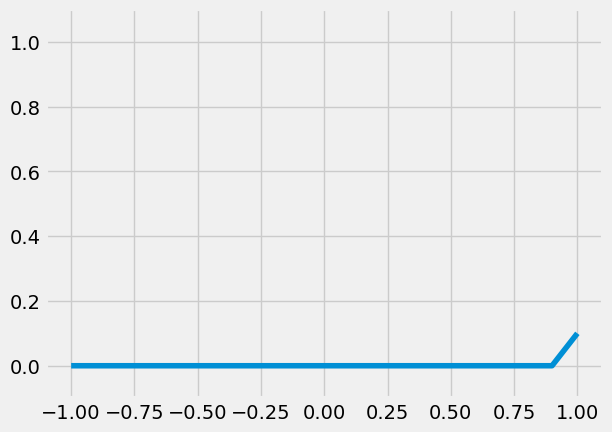

In [86]:
plt.plot(T, y_t)
plt.ylim([-0.1,1.1])
plt.show()